# Python as a client for GroLink

Basic examples of the interaction with the [Link API](https://wiki.grogra.de/doku.php?id=user-guide:additional_interfaces:api) through the Python client library [GroPy](https://gitlab.com/grogra/groimp-utils/pythonapilibrary). 

This Nodebook requires the GroIMP API application to run on an address that is reachable for the Nodeook. How to start the API is described [here](https://wiki.grogra.de/doku.php?id=tutorials:startup-api) and alternatively a docker image with all needed dependencies [here](https://gitlab.com/groimp-api-examples/docker).


## Content

0. [Installation & connection](#0)
1. [Creating a model and getting started](#1)
2. [EXG pipeline](#2)
3. [XL](#3)
4. [Reading Data](#4)
5. [Running in parallel](#5)



## 0. Installation <a name="0"></a>

The following command uses the [pip](https://pypi.org/project/pip/) package manager with the custom [repository of GroPy](https://gitlab.com/grogra/groimp-utils/pythonapilibrary/-/packages) and should work without any other preparations. 
If pip is not an option in your scenario please see [here](https://gitlab.com/grogra/groimp/-/wikis/Tutorials/Getting-started-with-GroLink-and-GroPy#gropy-installation).



In [1]:
pip install GroPy --upgrade --index-url https://gitlab.com/api/v4/projects/50527255/packages/pypi/simple

Looking in indexes: https://gitlab.com/api/v4/projects/50527255/packages/pypi/simple
Note: you may need to restart the kernel to use updated packages.



### 0.1  Initializing the connection

To create workbenches and workbench references the link to the API server must be defined at first. 


In [2]:
from GroPy import GroPy
link = GroPy.GroLink("http://localhost:58081/api/")

## 1. Creating a model and getting started <a name="1"></a>

This section is about the very basic usage of GroIMP and how to receive the first information. 


### 1.1 Create a new Workbench

Using the link defined in 0.1 the call to create a workbench can be generated.
A call holds all the information needed to trigger a command at the API. 
Run send the call to the server and read interprets the result. In this case that ends up telling the API to create a workbench and returning the workbench reference wb1.


In [2]:
wb1 = link.createWB().run().read()

### 1.2 Read basic content

To get an overview of the new workbench the source files and the currently implemented RGG functions.

This also works with calls, yet in that case the calls return JSON files including the requested content and allways the console (like the XL console) and the logs(like the messages)

In [3]:
# create a call
fileListCall = wb1.listFiles()
# execute the call
fileListCall.run()
# interprete the result
fileList = fileListCall.read()
# show the JSON content
fileList

{'console': [], 'data': ['Model.rgg', 'param/parameters.rgg'], 'logs': []}

In [4]:
# process the recived data

i=1
for f in fileList['data']:
    print(str(i)+")"+f)
    i+=1

1)Model.rgg
2)param/parameters.rgg


In [5]:
# similar to the two blocks above just a bit shorter
wb1.listRGGFunctions().run().read()['data']

['run', 'Run run']

### 1.3 Execute RGG functions

The above-listed functions can now be executed similarly to pressing the button in the Gui. The call again will return the console and log, in the example they are both empty but if the RGG function contains print commands the results will be in the console.

In [6]:
# create the call based on the function name
runner = wb1.runRGGFunction("run")
runner.run().read()

{'console': [], 'logs': []}

In [7]:
# A call can also be executed multiple times
for i in range(2):
    print(runner.run().read())

{'console': [], 'logs': []}
{'console': [], 'logs': []}


### 1.4 Model visualisation

With the export3d call, it is possible to export the model the same way as the export menu in the view3d panel. For the following example, x3d is used because it is very simple to visualize x3d in a web browser by linking it to some javascript.


In [8]:
# The call returns the content of the exported file, this must be decoded 
data = wb1.export3d("x3d").run().read().decode('utf-8')

In [9]:
# just help for visualizing the model

from IPython.display import display, HTML
js ="""<head>
    <script type='text/javascript' src='https://www.x3dom.org/download/x3dom.js'> </script>
    <link rel='stylesheet' type='text/css' href='https://www.x3dom.org/download/x3dom.css'/>
</head>"""
display(HTML(js+data))

### 1.5 Reading the Graph

A key part of GroIMP is the project graph, this graph can be read with the API. The returned graph is formatted in JSON and separated into a list of nodes and a list of edges. The edges are defined as a triple of the parent node ID, child node ID and edge byte.
Additionally, the root is defined.


In [10]:
graph = wb1.getProjectGraph().run() .read()
graph

{'projectgraphNodes': [{'id': 0, 'type': 'de.grogra.graph.impl.Node'},
  {'id': 21, 'type': 'de.grogra.rgg.RGGRoot'},
  {'id': 24, 'type': 'de.grogra.turtle.F'},
  {'id': 25, 'type': 'de.grogra.turtle.RU'},
  {'id': 26, 'type': 'de.grogra.turtle.RH'},
  {'id': 31, 'type': 'de.grogra.turtle.F'},
  {'id': 32, 'type': 'de.grogra.turtle.RU'},
  {'id': 33, 'type': 'de.grogra.turtle.RH'},
  {'id': 45, 'type': 'de.grogra.turtle.F'},
  {'id': 46, 'type': 'de.grogra.turtle.RU'},
  {'id': 47, 'type': 'de.grogra.turtle.RH'},
  {'id': 48, 'type': 'Model.A'},
  {'id': 49, 'type': 'de.grogra.turtle.RU'},
  {'id': 50, 'type': 'de.grogra.turtle.RH'},
  {'id': 51, 'type': 'Model.A'},
  {'id': 35, 'type': 'de.grogra.turtle.RU'},
  {'id': 36, 'type': 'de.grogra.turtle.RH'},
  {'id': 52, 'type': 'de.grogra.turtle.F'},
  {'id': 53, 'type': 'de.grogra.turtle.RU'},
  {'id': 54, 'type': 'de.grogra.turtle.RH'},
  {'id': 55, 'type': 'Model.A'},
  {'id': 56, 'type': 'de.grogra.turtle.RU'},
  {'id': 57, 'type': '

More over it is possible to visualize the Graph...

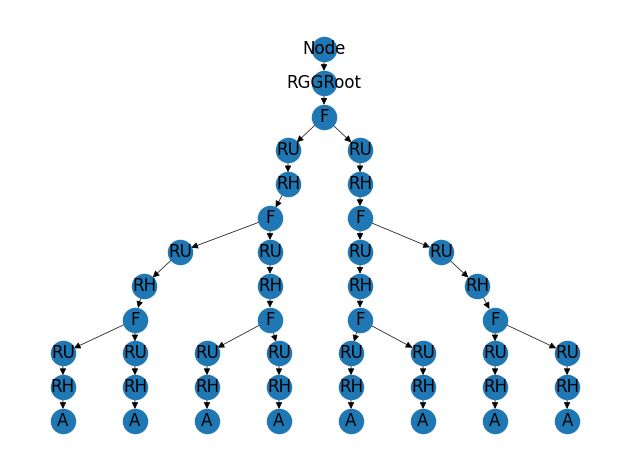

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
labels={}
pos = {0: (0, 0)} 
for n in graph['projectgraphNodes']:
    G.add_node(n['id'])
    labels[n['id']] = n['type'].split('.')[-1]
for e in graph['projectgraphEdges']:
    G.add_edge(e[0], e[1])
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw_networkx_labels(G, pos, labels)
nx.draw(G, pos,width=0.5)
plt.tight_layout()
plt.axis("off")
plt.show()

### 1.6 Closing a workbench

A workbench opened with the API must be closed with the API or it stays open til the API is stopped. 

##  2. XEG Pipeline <a name="2"></a>

The following example shows how a subgraph can be imported, changed and exported with the API.



### 2.1. Create an empty project with a function to manipulate

To generate a basic environment for the pipe line a new workbench is created and the source file is changed to create the needed environment. 

In [3]:
# creat a new workbench
wb2 = link.createWB().run().read()

In [4]:
# update the Model.rgg file like in JEdit in the GUI
wb2.updateFile("Model.rgg","""
module B(float len) extends Sphere(0.1)
{
	{setShader(GREEN);}
}


public void change ()
[
	B(x) ==> F(x) B(x);
]

""").run().read()

# compile to build the new scene
wb2.compile().run().read()

{'console': [], 'logs': []}

Now the project graph is empty and does and only contains a not-used axiom.

In [5]:
wb2.getProjectGraph().run().read()

{'projectgraphNodes': [{'id': 0, 'type': 'de.grogra.graph.impl.Node'},
  {'id': 30, 'type': 'de.grogra.rgg.RGGRoot'},
  {'id': 31, 'type': 'de.grogra.rgg.Axiom'}],
 'console': [],
 'projectgraphEdges': [[0, 30, 512], [30, 31, 256]],
 'projectgraphRoot': '0',
 'logs': []}

### 2.2. Add an XEG graph to the model

It is possible to add objects defined by files similar to using 'Objects/insert file' in the GUI.
In this example, XEG is used.

In [6]:
wb2.addNode("xeg","""
<graph>
  <root root_id="0"/>
  <type name="B">
    <extends name="Sphere"/>
    <property name="len" type="float"/>
  </type>
  <node id="1" name="" type="B">
    <property name="radius" value="0.1"/>
    <property name="color">
      <rgb>0.0 1.0 0.0</rgb>
    </property>
    <property name="len" value="1.0"/>
  </node>
  <edge id="2" src_id="0" dest_id="1" type="decomposition"/>
</graph>
""").run().read()

{'console': [], 'logs': []}

In [7]:
# The graph now contains a node called Model.B as the one defined in XEG
wb2.getProjectGraph().run().read()

{'projectgraphNodes': [{'id': 0, 'type': 'de.grogra.graph.impl.Node'},
  {'id': 30, 'type': 'de.grogra.rgg.RGGRoot'},
  {'id': 31, 'type': 'de.grogra.rgg.Axiom'},
  {'id': 32, 'type': 'Model.B'}],
 'console': [],
 'projectgraphEdges': [[0, 30, 512], [0, 32, 512], [30, 31, 256]],
 'projectgraphRoot': '0',
 'logs': []}

### 2.3. Execute the RGG function to change the sub-graph

Now the in 'main.rgg' defined function can be executed to change the scene graph.


In [8]:
wb2.runRGGFunction("change").run().read()

{'console': [], 'logs': []}

### 2.4. export to XEG again

The project graph can now be exported back to XEG in the same way as above in 1.4. The newly created XEG contains an additional F.

In [9]:
print(wb2.export3d("xeg").run().read().decode('utf-8'))

<?xml version="1.0" encoding="UTF-8"?>
<graph>
  <root root_id="30"/>
  <node id="0" name="" type="Node"/>
  <edge id="-1" src_id="0" dest_id="30" type="branch"/>
  <node id="30" name="" type="RGGRoot"/>
  <edge id="-1" src_id="30" dest_id="31" type="successor"/>
  <node id="31" name="" type="Axiom"/>
  <edge id="-1" src_id="0" dest_id="33" type="branch"/>
  <node id="33" name="" type="F">
    <property name="length" value="1.0"/>
    <property name="diameter" value="-1.0"/>
    <property name="fcolor" value="-1"/>
  </node>
  <edge id="-1" src_id="33" dest_id="34" type="successor"/>
  <type name="B">
    <extends name="Sphere"/>
    <property name="len" type="float"/>
  </type>
  <node id="34" name="" type="B">
    <property name="radius" value="0.1"/>
    <property name="color">
      <rgb>0.0 1.0 0.0</rgb>
    </property>
    <property name="len" value="1.0"/>
  </node>
</graph>


In [10]:
wb2.close().run()


## 3 XL queries and rules<a name="3"></a>

Similar to rgg functions it is also possible to manipulate the model with xl queries and rewriting rules.

In [20]:
# first a workbench is created based on a empty rgg template
wb3 = link.createWB(template="newRGG").run().read()
wb3.getProjectGraph().run().read()

{'projectgraphNodes': [{'id': 0, 'type': 'de.grogra.graph.impl.Node'},
  {'id': 21, 'type': 'de.grogra.rgg.RGGRoot'},
  {'id': 23, 'type': 'Model.A'}],
 'console': [],
 'projectgraphEdges': [[0, 21, 512], [21, 23, 256]],
 'projectgraphRoot': '0',
 'logs': []}

In [21]:
# simple rewriting
wb3.runXLQuery("[Model.A==> F;]").run().read()

{'console': [], 'logs': []}

In [22]:
wb3.getProjectGraph().run().read()

{'projectgraphNodes': [{'id': 0, 'type': 'de.grogra.graph.impl.Node'},
  {'id': 21, 'type': 'de.grogra.rgg.RGGRoot'},
  {'id': 24, 'type': 'de.grogra.turtle.F'}],
 'console': [],
 'projectgraphEdges': [[0, 21, 512], [21, 24, 256]],
 'projectgraphRoot': '0',
 'logs': []}

In [23]:
# simple querying for information
print("number of F nodes:"+ wb3.runXLQuery("count((*F*))").run().read()['console'][0])
print("number of nodes:"+ wb3.runXLQuery("count((*Node*))").run().read()['console'][0])

number of F nodes:1
number of nodes:2


In [24]:
# more rewriting
wb3.runXLQuery("[F==>F [F F];]").run().read()

{'console': [], 'logs': []}

In [25]:
wb3.getProjectGraph().run().read()

{'projectgraphNodes': [{'id': 0, 'type': 'de.grogra.graph.impl.Node'},
  {'id': 21, 'type': 'de.grogra.rgg.RGGRoot'},
  {'id': 25, 'type': 'de.grogra.turtle.F'},
  {'id': 26, 'type': 'de.grogra.turtle.F'},
  {'id': 27, 'type': 'de.grogra.turtle.F'}],
 'console': [],
 'projectgraphEdges': [[0, 21, 512],
  [21, 25, 256],
  [25, 26, 512],
  [26, 27, 256]],
 'projectgraphRoot': '0',
 'logs': []}

In [26]:
# changing one edge between two nodes
wb3.runXLQuery("[a:F +> b:F ==> a > b;]").run().read()

{'console': [], 'logs': []}

In [27]:
wb3.getProjectGraph().run().read()

{'projectgraphNodes': [{'id': 0, 'type': 'de.grogra.graph.impl.Node'},
  {'id': 21, 'type': 'de.grogra.rgg.RGGRoot'},
  {'id': 25, 'type': 'de.grogra.turtle.F'},
  {'id': 26, 'type': 'de.grogra.turtle.F'},
  {'id': 27, 'type': 'de.grogra.turtle.F'}],
 'console': [],
 'projectgraphEdges': [[0, 21, 512],
  [21, 25, 256],
  [25, 26, 256],
  [26, 27, 256]],
 'projectgraphRoot': '0',
 'logs': []}

In [28]:
wb3.close().run()

## 4. Reading Data<a name="4"></a>

To receive more data measured during the simulation, datasets are used, which can be read through the API.
To demonstrate that a simple existing model with two light sources and two "plants" is used.

In [29]:
import pandas as pd
import io
from matplotlib import pyplot as plt

### 4.1 Opening an existing model

An existing model can be opened by either sending a path to the project file or by sending a .gsz file as binary content. 

In [30]:
# The model is read in Python as binary (rb) and the content is transferred to the API
wb4 = link.openWB(content=open("left_right_light.gsz",'rb').read()).run().read()

In [31]:
# reading the content of the Model.rgg file 
print(wb4.getFile("Model.rgg").run().read().decode("utf-8"))

// import other compiled files (.rgg, .java, .xl) without subdirectory path.
import parameters.*;
static FluxLightModel lm = new FluxLightModel(50000, 5);
module A(float len) extends Sphere(0.1)
{
	{setShader(GREEN);}
}

module pL();

module pR();

DatasetRef lightSum = new DatasetRef("lightSum");

module Light(float pow) extends LightNode(){ 
			DirectionalLight dl= new DirectionalLight();
		{
			dl.(setPowerDensity(pow));
			setLight(dl);
		}
		void setPow(float po){
			dl.(setPowerDensity(po));
		
		}
	} 

	
module lL(float po) extends Light(po);

module lR(float po) extends Light(po);


module Leaf(float x, float y)==>leaf(x,y);

protected void init ()
[
	{
		lightSum.clear();
		lightSum.addRow()
			.setText(0,"left")
			.setText(1,"right");
		
	}
	Axiom ==> [Translate(1,0,0)RH(180)pR()A(parameters.length)]
	[Translate(-1,0,0)pL()A(parameters.length)]
	[
	Translate(5,0,10)RU(205) lR(100)
	]
	[
	Translate(-5,0,10)RU(-205) lL(100)
	]

	
	
	;
]

public void grow ()
[
	A(x) ==> F(x) [R

### 4.2 Growing and reading data 

With the execution of the growth function, the plants grow and add data to the dataset. This data set can then be plotted.

In [32]:
# define the calls 
grower = wb4.runRGGFunction("grow")
reader = wb4.getDataset("lightSum")

In [33]:
# Run the Model 3 times
for i in range(3):
    grower.run()

The received dataset is formated as csv and can directly be transfered into a pada dataframe 

In [34]:
data = pd.read_csv(io.StringIO(reader.run().read().decode('utf-8')))
data

left       right
0    0.000000    0.000000
1  117.676081  115.423834
2  190.185858  187.045337

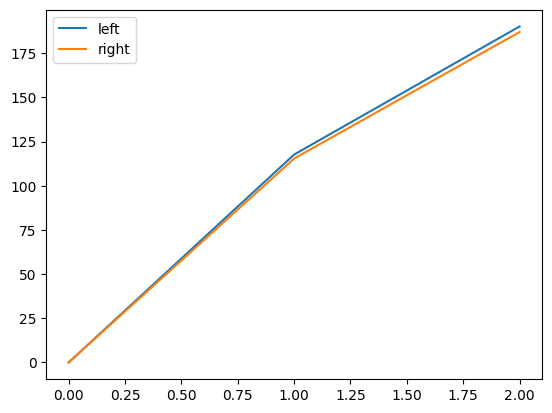

In [35]:
# based on the dataframe a simple plot can be created
plt.plot(data['left'],label="left")
plt.plot(data['right'], label="right")
plt.legend(loc="upper left")
plt.show()

### 4.3 Changing conditions

To show the ability to interact with a running simulation the left light source will be increased to 400 before running additional growth steps.


In [36]:
wb4.runXLQuery("[Model.lL(x)==>Model.lL(400);]").run().read()

{'console': [], 'logs': []}

Redo step 4.2

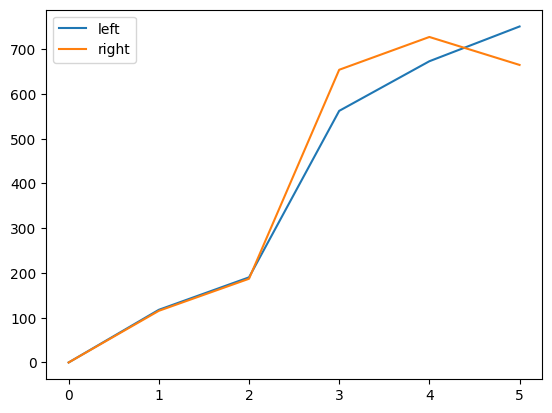

In [37]:
for i in range(3):
    grower.run()
data = pd.read_csv(io.StringIO(reader.run().read().decode('utf-8')))
plt.plot(data['left'],label="left")
plt.plot(data['right'], label="right")
plt.legend(loc="upper left")
plt.show()

In [38]:
wb4.close().run()

### 4.X

The steps above can also be used to create a direct comparison of the influence of a change in the light source.


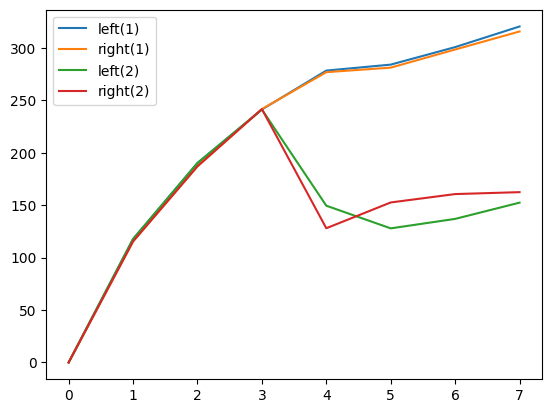

In [39]:

# open the project twice 
opener = link.openWB(content=open("left_right_light.gsz",'rb').read())
wb41=opener.run().read()
wb42=opener.run().read()

# define the calles
grower1 = wb41.runRGGFunction("grow")
reader1 = wb41.getDataset("lightSum")
grower2 = wb42.runRGGFunction("grow")
reader2 = wb42.getDataset("lightSum")


# grow both models
for i in range(4):
    grower1.run()
    grower2.run()

# turn of the left light on one of them 
wb42.runXLQuery("[Model.lL(x)==>Model.lL(0);]").run().read()

# grow both models.
for i in range(4):
    grower1.run()
    grower2.run()

# read the datasets
data1 = pd.read_csv(io.StringIO(reader1.run().read().decode('utf-8')))
data2 = pd.read_csv(io.StringIO(reader2.run().read().decode('utf-8')))

# close the models
wb41.close().run()
wb42.close().run()

# plot
plt.plot(data1['left'],label="left(1)")
plt.plot(data1['right'], label="right(1)")
plt.plot(data2['left'],label="left(2)")
plt.plot(data2['right'], label="right(2)")

plt.legend(loc="upper left")
plt.show()

## 5. Running in Parallel <a name="5"></a>

GroLink executes commands in a nonblocking way, meaning that several commands can be pushed to the API and they are executed in parallel.
This is shown by a simple example of a function that just waits for 5 seconds and then prints hello.


#### 5.1 creating 50 workbenches with the same command


In [40]:
%%time
# create a new RGG workbench
wb5= link.createWB().run().read()
# define function and compile
wb5.updateFile("Model.rgg",""" 
      public void runner(){
        Thread.sleep(5000);
        println("hello");    
    }
""").run()
wb5.compile().run()

# saving the newly created workbench as a python variable
data_tmp = wb5.save().run().read()
wb5.close().run()


# open 50 instances based on the saved model
wbs=[]
for i in range(0,50):
    wbs.append(link.openWB(content = data_tmp).run().read())

CPU times: user 46.5 ms, sys: 9.91 ms, total: 56.4 ms
Wall time: 394 ms


### 5.2 Compare running one model to running 50

In [41]:
# a help function for paralellisation 
def callIt(wb): 
    return wb.runRGGFunction("runner").run().read()

running the function on one Workbench

In [42]:
%%time
callIt(wbs[0])

CPU times: user 1.69 ms, sys: 1.04 ms, total: 2.73 ms
Wall time: 5.01 s


{'console': ['hello'], 'logs': []}

Running it on all Workbenches

In [43]:
%%time
import multiprocessing
if __name__ == '__main__':
    # the processes variable defines how many requests are done in parallel, at this point that is the only limt(the API server will just try to run all you put in)
    pool = multiprocessing.Pool(processes=50)
    results = pool.map(callIt,wbs)
results

CPU times: user 23.5 ms, sys: 109 ms, total: 133 ms
Wall time: 5.19 s


[{'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 {'console': ['hello'], 'logs': []},
 

In [44]:
%%time
for wb in wbs:
    wb.close().run()

CPU times: user 26.7 ms, sys: 3.53 ms, total: 30.3 ms
Wall time: 83.2 ms
